## Seminário da Diciplina Análise Multivariada.
#### Aluno: Renan Lemes Leepkaln
#### Aluno: Valdiclei Costa Marinho 
----

Explicando nosso dataset:
* Gender: Gênero do cliente (masculino ou feminino).
* Age: Idade do cliente em anos.
* Driving_License: Indica se o cliente possui carteira de motorista (1 para sim, 0 para não).
* Region_Code: Código da região do cliente.
* Previously_Insured: Indica se o cliente possui seguro de automóvel anteriormente (1 para sim, 0 para não).
* Vehicle_Age: Idade do veículo.
* Vehicle_Damage: Indica se o veículo sofreu danos anteriormente (1 para sim, 0 para não).
* Annual_Premium: Prêmio anual a ser pago pelo seguro de automóvel.
* Policy_Sales_Channel: Canal de vendas.
* Vintage: Número de dias que o cliente associou-se à empresa.
* Response: Indica se o cliente respondeu positivamente à oferta de seguro (1 para sim, 0 para não).


Vamos supor que uma empresa de seguros automotivos contratou nossa empresa para avaliar os dados deles e tirar conclusões com base em uma amostra fornecida por eles.

----

### 1. Exploração Inicial dos dados

In [107]:
## Libs de tratamento e visualização de graficos
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv", index_col=0)

In [4]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [6]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

-----

### 2. Análise Descritiva

In [8]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


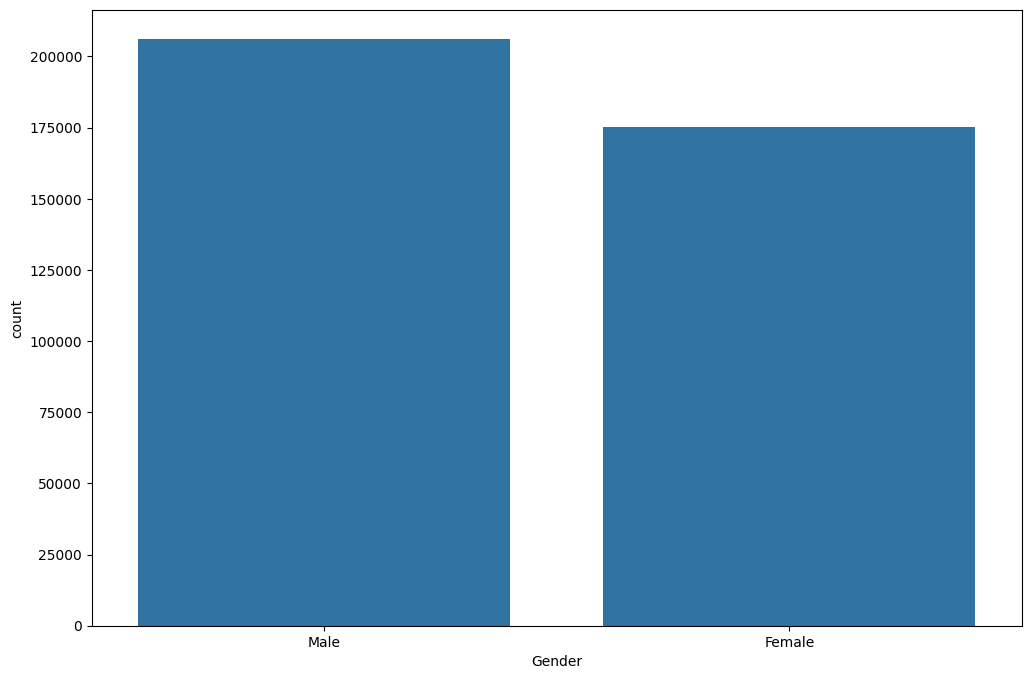

In [9]:
plt.figure(figsize=(12,8)) ## tamanho da figura
sns.countplot(x="Gender", data=df) ## grafico de barras
plt.show() ## mostrar grafico

In [10]:
size = [len(df["Gender"][df.Gender == "Male"]), len(df["Gender"][df.Gender == "Female"])]
labels = ['male', 'female']

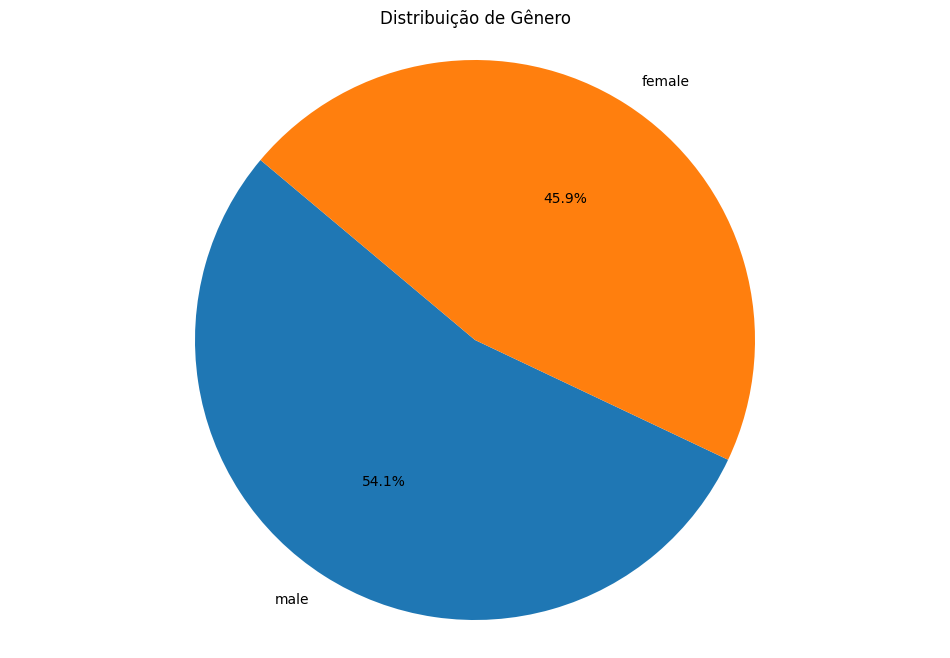

In [11]:
# Criar o gráfico de pizza
plt.figure(figsize=(12, 8))  # Define o tamanho da figura (opcional)
plt.pie(size, labels=labels, autopct="%1.1f%%", startangle=140)  # Cria o gráfico de pizza com rótulos
plt.title("Distribuição de Gênero", fontsize=12)  # Define o título do gráfico
plt.axis("equal")  # Faz com que o gráfico de pizza seja circular
plt.show()  # Mostra o gráfico

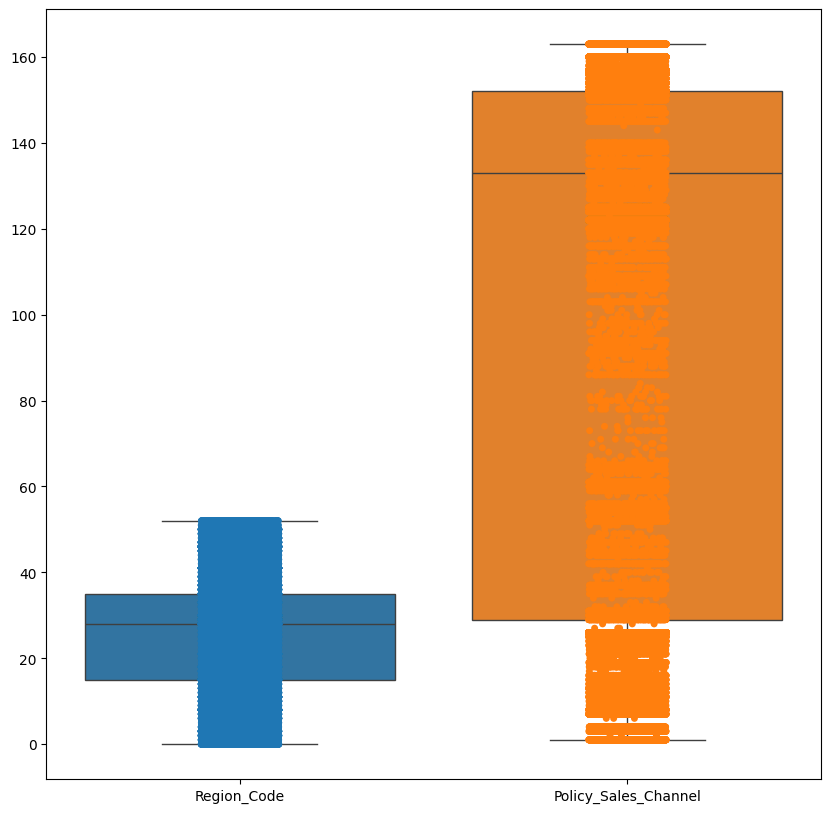

In [12]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(data=df[["Region_Code", "Policy_Sales_Channel"]])
sns.stripplot(data=df[["Region_Code", "Policy_Sales_Channel"]])

plt.show()

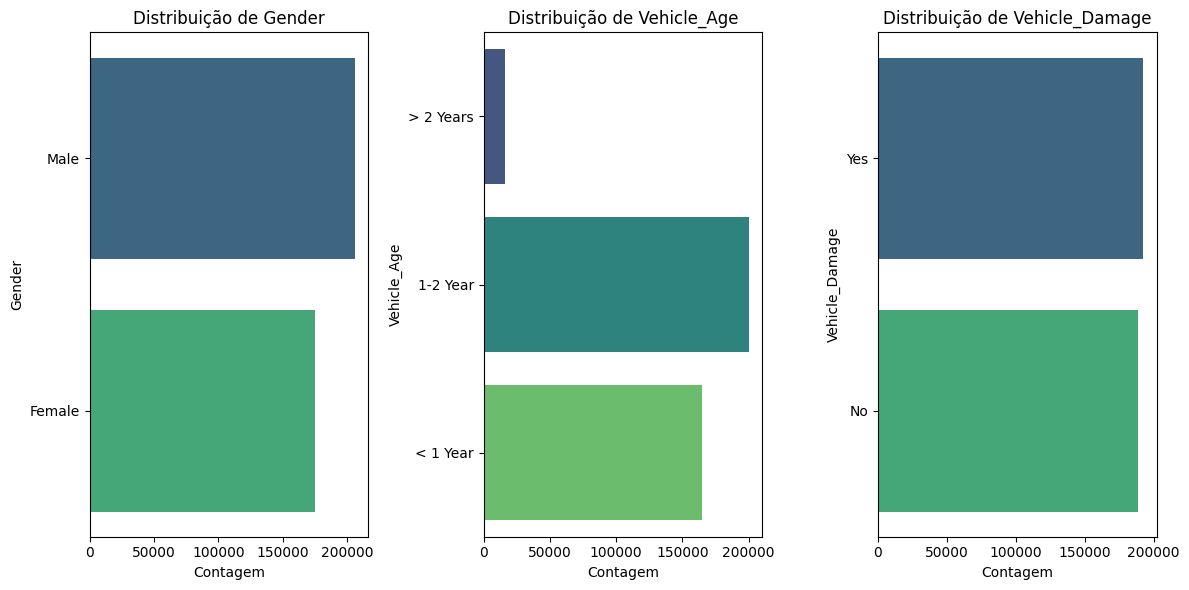

In [13]:
# Filtrar apenas as colunas numéricas e categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Criar gráficos para colunas categóricas
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(y=col, data=df, palette="viridis")
    plt.title(f"Distribuição de {col}", fontsize=12)
    plt.xlabel("Contagem", fontsize=10)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()

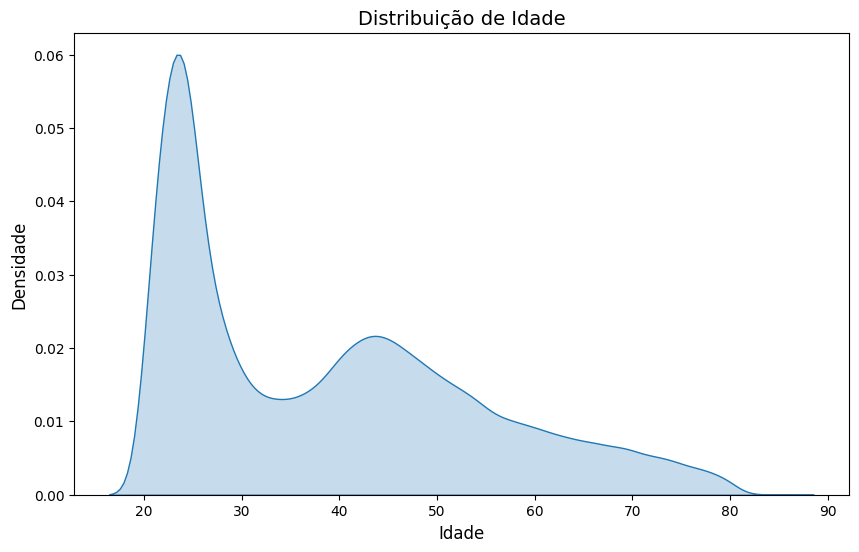

In [14]:
# Criar o gráfico de densidade
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.kdeplot(data=df["Age"], shade=True)  # Cria o gráfico de densidade
plt.title("Distribuição de Idade", fontsize=14)  # Adiciona um título ao gráfico
plt.xlabel("Idade", fontsize=12)  # Adiciona um rótulo ao eixo x
plt.ylabel("Densidade", fontsize=12)  # Adiciona um rótulo ao eixo y
plt.show()

Aqui já com a análise descritiva podemos notar algumas relevancias nos nossos dados como por exemplo, não temos tanta diferença na questão de genero nos nossos dados, também podemos notar que não temos problemas com outliers, e mais importante porederiamos recomendar com base na nossa densidade de distribuição da idade, ajudar na questão do foco do markting voltar para a idade de 20 a 30 anos.

-----

### 3. Análise Multivariada

Vamos iniciar primeiro avaliando a correlação dos nossos dados para poder ter melhor imersão.

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [16]:
corr_m = df_encoded.corr()

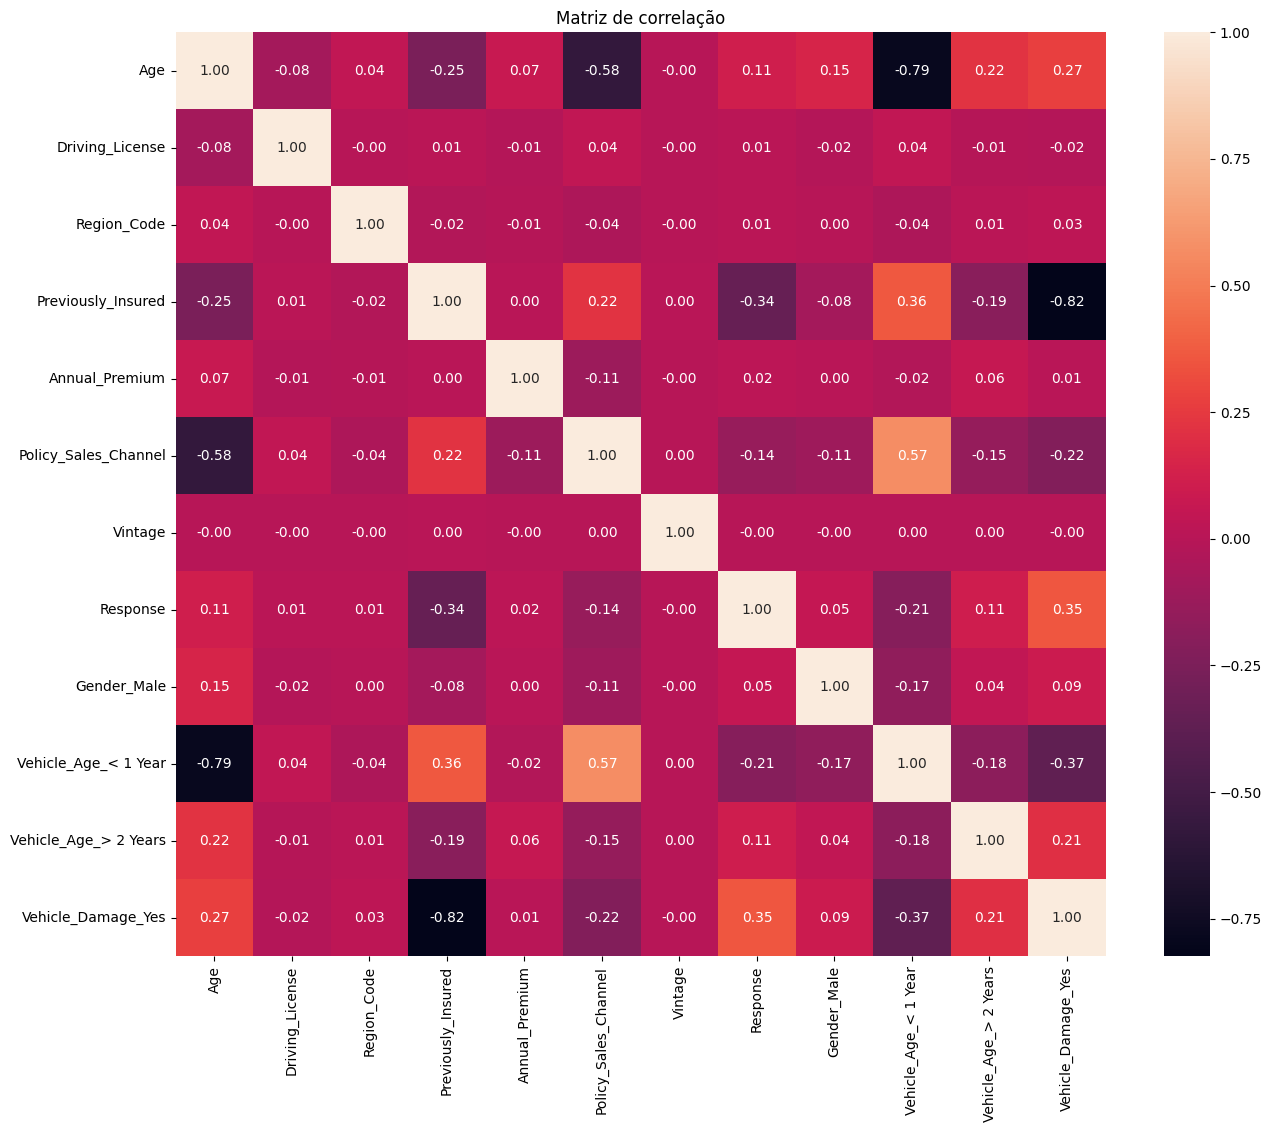

In [17]:
plt.figure(figsize=(15, 12))
plt.title("Matriz de correlação")
sns.heatmap(corr_m, annot=True, fmt=".2f")
plt.show()

Na nossa matrix de correlação conseguimos notar bastante correlação negativa, entre a idade e o veiculo ser de menos de um ano, da idade com o canal de vendas, com o veiculo ter sofrido danos com o dono possuir seguro no carro anteriormente e uma correlação possitiva entre o canal de vendas com o veiculo ter menos de um ano.

Agora vamos partir para para a **análise de agrupamento** utilizaremos o método K-Means e a técnica Elbow que e dada por:
Seja $X = \begin{Bmatrix} {x_1, x_2, ..., x_n} \end{Bmatrix} $ um conjunto de dados então.
$$
    I_k = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$ 
* $I_k$ é a Inércia que é a medida de quanto os pontos de dados de um cluster estão próximos do seu centroide.
* $C_i$ é o i-ésimo cluster.
* $\mu_i$ o centroide do i-ésimo cluster.
O critério de escolha é encontrar um equilíbrio entre o número de clusters e a redução da inércia.

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances

In [19]:
df_encoded.drop(
    columns=["Previously_Insured", "Response", "Driving_License"], inplace=True
)

In [20]:
df_encoded.drop(columns=["Gender_Male",	"Vehicle_Age_< 1 Year",	"Vehicle_Age_> 2 Years","Vehicle_Damage_Yes"], inplace=True)

In [21]:
df_numeric = df_encoded.select_dtypes(include=np.number)

df_numeric.fillna(df_numeric.median(), inplace=True)


In [22]:
df_numeric

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,
1,44,28.0,40454.0,26.0,217
2,76,3.0,33536.0,26.0,183
3,47,28.0,38294.0,26.0,27
4,21,11.0,28619.0,152.0,203
5,29,41.0,27496.0,152.0,39
...,...,...,...,...,...
381105,74,26.0,30170.0,26.0,88
381106,30,37.0,40016.0,152.0,131
381107,21,30.0,35118.0,160.0,161


In [23]:
df_numeric.reset_index(drop=True)

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,40454.0,26.0,217
1,76,3.0,33536.0,26.0,183
2,47,28.0,38294.0,26.0,27
3,21,11.0,28619.0,152.0,203
4,29,41.0,27496.0,152.0,39
...,...,...,...,...,...
381104,74,26.0,30170.0,26.0,88
381105,30,37.0,40016.0,152.0,131
381106,21,30.0,35118.0,160.0,161
381107,68,14.0,44617.0,124.0,74


In [24]:
df_numeric.Vintage = df_numeric.Vintage.astype('float')
df_numeric.Age = df_numeric.Age.astype('float')


In [25]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   381109 non-null  float64
 1   Region_Code           381109 non-null  float64
 2   Annual_Premium        381109 non-null  float64
 3   Policy_Sales_Channel  381109 non-null  float64
 4   Vintage               381109 non-null  float64
dtypes: float64(5)
memory usage: 17.4 MB


In [26]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [27]:
df_scaled = scaler.fit_transform(df_numeric)

In [28]:
df_scaled

array([[ 0.33377727,  0.12178446,  0.57453868, -1.58723371,  0.74879538],
       [ 2.39675074, -1.76787876,  0.17263624, -1.58723371,  0.34244286],
       [ 0.52718104,  0.12178446,  0.4490531 , -1.58723371, -1.52199808],
       ...,
       [-1.14898491,  0.27295751,  0.26454281,  0.88491205,  0.07950888],
       [ 1.88100737, -0.93642695,  0.81638891,  0.22075349, -0.96027549],
       [ 0.46271311,  0.19737098,  0.6513986 , -1.58723371,  0.98782627]])

In [29]:
metrics = ['euclidean', 'manhattan', 'minkowski']


# Amostragem aleatória do conjunto de dados
sample_size = 10000
random_indices = np.random.choice(df_scaled.shape[0], size=sample_size, replace=False)
df_scaled_sample = df_scaled[random_indices]

# Dicionário para armazenar as inércias para cada métrica
metric_dict = {metric: [] for metric in metrics}

# Calcular a inércia para diferentes números de clusters (k) e métricas de distância
for k in range(2, 6):
    for metric in metrics:
        distances = pairwise_distances(df_scaled_sample, metric=metric)
        print(k)
        # Inicializar o modelo K-means e calcular a inércia
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(distances)
        metric_dict[metric].append(kmeans.inertia_)

2
2
2
3
3
3
4
4
4
5
5
5


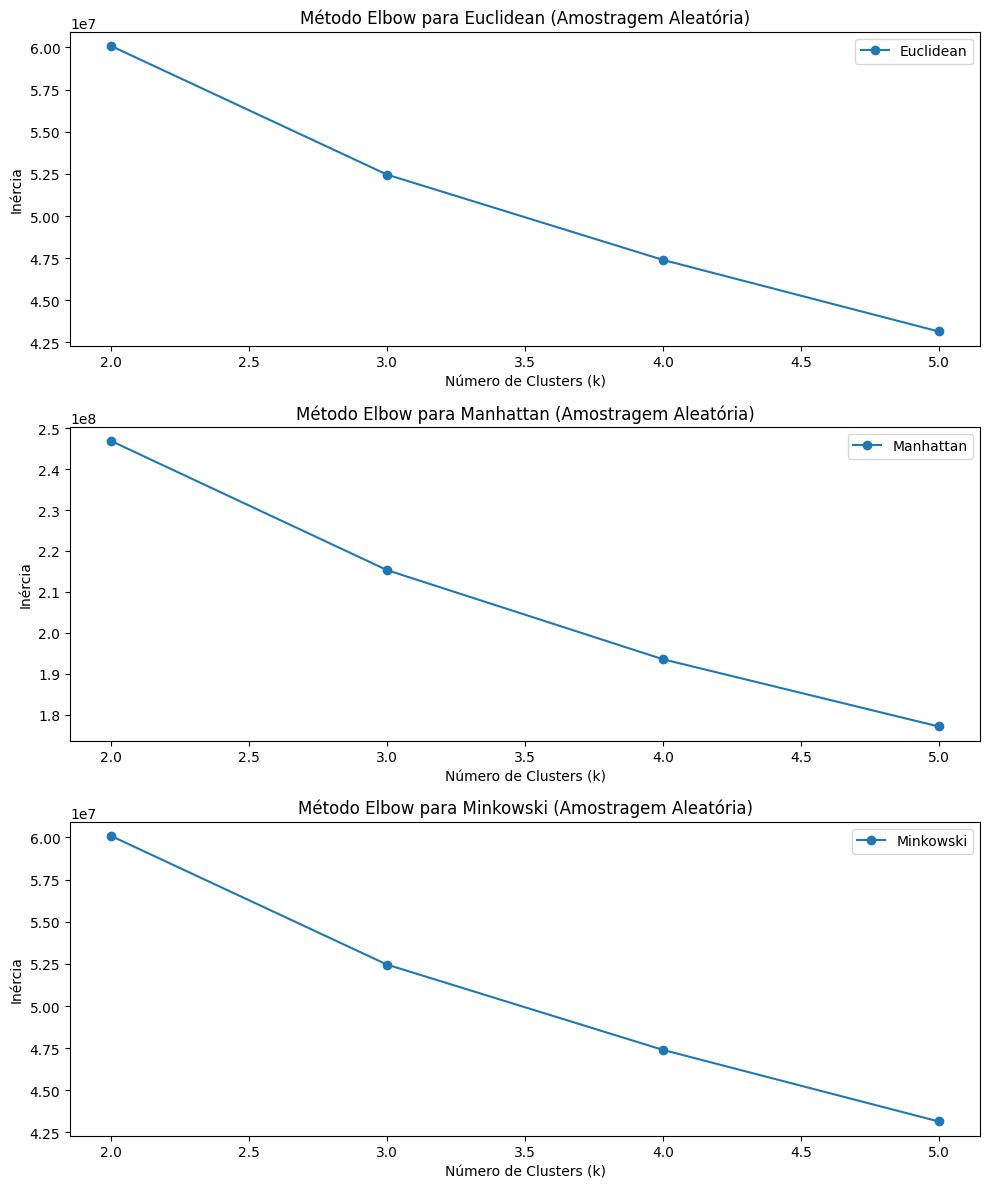

In [37]:
plt.figure(figsize=(10, 12))
for i, (metric, inertia_values) in enumerate(metric_dict.items(), 1):
    plt.subplot(len(metric_dict), 1, i)
    plt.plot(range(2, 6), inertia_values[:4], label=metric.capitalize(), marker="o")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Inércia")
    plt.title(f"Método Elbow para {metric.capitalize()} (Amostragem Aleatória)")
    plt.legend()

plt.tight_layout()
plt.show()

Assim identificamos o melhor valor para k=3.

In [46]:
metric_dict = {metric: {"model": None, "inertia": []} for metric in metrics}

# Loop sobre as métricas
for metric in metrics:
    # Calcular as distâncias usando a métrica especificada
    distances = pairwise_distances(df_scaled_sample, metric=metric)

    # Inicializar e ajustar o modelo K-means com 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(distances)

    # Armazenar o modelo e a inércia no dicionário
    metric_dict[metric]["model"] = kmeans
    metric_dict[metric]["inertia"].append(kmeans.inertia_)


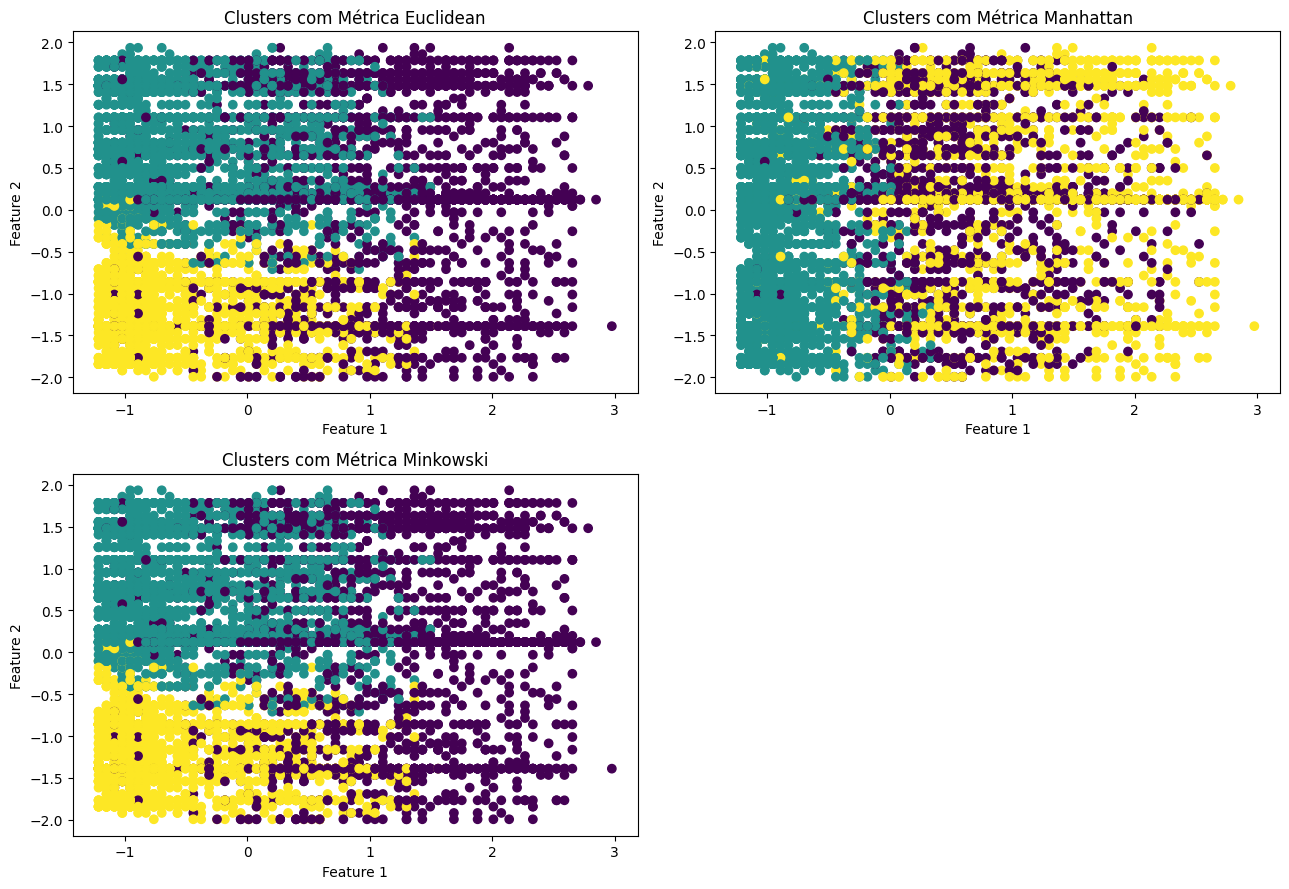

In [56]:
# Plotar os gráficos de dispersão para cada métrica
plt.figure(figsize=(13, 9))
for i, (metric, data) in enumerate(metric_dict.items(), 1):
    plt.subplot(2, 2, i)
    clusters = data["model"].labels_
    plt.scatter(
        df_scaled_sample[:, 0], df_scaled_sample[:, 1], c=clusters, cmap="viridis"
    )
    plt.title(f"Clusters com Métrica {metric.capitalize()}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [57]:
k = 3  # Número escolhido com base no método Elbow

# Aplicar o algoritmo K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionar os resultados do clustering de volta ao DataFrame original
df["Cluster"] = clusters

In [58]:
cluster_metrics = {}
for cluster_id in range(k):
    cluster_data = df[df["Cluster"] == cluster_id]
    cluster_metrics[cluster_id] = {
        "Count": len(cluster_data),
        "Mean_Age": cluster_data["Age"].mean(),
        "Mean_Annual_Premium": cluster_data["Annual_Premium"].mean(),
        # Adicione outras métricas aqui, conforme necessário
    }

In [59]:
# Imprimir métricas de cada cluster
for cluster_id, metrics in cluster_metrics.items():
    print(f"Cluster {cluster_id}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Cluster 0:
Count: 158642
Mean_Age: 31.88266032954703
Mean_Annual_Premium: 29083.44777549451

Cluster 1:
Count: 97937
Mean_Age: 30.577013794582232
Mean_Annual_Premium: 27486.312976709516

Cluster 2:
Count: 124530
Mean_Age: 54.148285553681845
Mean_Annual_Premium: 34871.762571267966



Interpretando essas informações, podemos inferir que:

* O Cluster 0 contém clientes mais jovens com prêmios anuais moderados.
* O Cluster 1 inclui clientes mais jovens com prêmios anuais ligeiramente mais baixos que o Cluster 0.
* O Cluster 2 é composto por clientes mais velhos com prêmios anuais mais altos.

$\newline$ Essas observações podem ser úteis para segmentar os clientes com base em características demográficas e de custo, o que pode orientar estratégias de marketing, precificação e atendimento ao cliente.

Então aqui ja temos um panorama maior apos nossa análise multivariada na questão do agrupamento de features, poderiamos repassar para nosso gestor e informar uma relevância de três clusteres que poderiamos um modelo de classificação com base nas features e identificando o poder monetario como Low Medium e High assim como os dados estão dispersos nos mostrão.

------

### 4. Aprofundando mais nas Técnicas Multivariadas:

Vamos aplicar o CCA (correlação canônica), dividiremos o dataframe em categoricas e numericas assim aplicaremos o modelo dado como :

$$U = a^\top X, \newline V = b^\top Y$$

In [60]:
from sklearn.cross_decomposition import CCA

In [72]:
scaler = StandardScaler()

In [63]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [67]:
df_encoded = df_encoded.reset_index(drop=True)

In [68]:
df_encoded

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Cluster,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,2,True,False,True,True
1,76,1,3.0,0,33536.0,26.0,183,0,2,True,False,False,False
2,47,1,28.0,0,38294.0,26.0,27,1,2,True,False,True,True
3,21,1,11.0,1,28619.0,152.0,203,0,1,True,True,False,False
4,29,1,41.0,1,27496.0,152.0,39,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,2,True,False,False,False
381105,30,1,37.0,1,40016.0,152.0,131,0,0,True,True,False,False
381106,21,1,30.0,1,35118.0,160.0,161,0,0,True,True,False,False
381107,68,1,14.0,0,44617.0,124.0,74,0,2,False,False,True,True


In [88]:
X1 = df_encoded[["Age", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]]
X2 = df_encoded.drop(
    columns=[
        "Age",
        "Region_Code",
        "Annual_Premium",
        "Policy_Sales_Channel",
        "Vintage",
        "Cluster",
    ],
    axis=1,
)

In [89]:
X1 = scaler.fit_transform(X1)
X2 = X2.astype('int')

In [90]:
X2.head()

,Driving_License,Previously_Insured,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,0,1,1,0,1,1
1,1,0,0,1,0,0,0
2,1,0,1,1,0,1,1
3,1,1,0,1,1,0,0
4,1,1,0,0,1,0,0


In [91]:
# Inicializar o objeto CCA com o número de componentes desejado
cca = CCA(n_components=2)

# Ajustar o modelo CCA aos dados
cca.fit(X1, X2)

CCA()

In [92]:
# Obter os coeficientes de correlação canônica
cca_coef = cca.coef_

# Exibir os coeficientes de correlação canônica
print("Coeficientes de correlação canônica:")
for i in range(cca_coef.shape[0]):
    print(f"\nComponente {i+1}: {cca_coef[i]}")

Coeficientes de correlação canônica:

Componente 1: [-0.01063414  0.00950837 -0.09121591  0.06090476 -0.44350088  0.10403951
  0.03334436]

Componente 2: [ 0.00031801 -0.01105084  0.00838244  0.00243288 -0.00630443 -0.00240991
  0.00912159]

Componente 3: [-0.00299759  0.09500776 -0.07420373 -0.0193136   0.04278069  0.02331283
 -0.07737342]

Componente 4: [-0.00791352  0.27807181 -0.21020958 -0.06175652  0.16247278  0.05976954
 -0.22987806]

Componente 5: [-0.0002199   0.00638214 -0.00513497 -0.00118465  0.00207038  0.00174852
 -0.00512384]


In [93]:
U, V = cca.transform(X1, X2)

In [94]:
U

array([[ 0.66956686, -0.93866289],
       [ 2.67545442,  0.20720741],
       [ 0.86801653, -0.91062678],
       ...,
       [-1.3362427 ,  0.13202382],
       [ 1.72166258,  1.54416151],
       [ 0.79076914, -0.83732351]])

In [95]:
V

array([[ 1.18741369,  0.59552656],
       [ 0.87502375, -0.48936062],
       [ 1.18741369,  0.59552656],
       ...,
       [-1.08900544,  0.44535222],
       [ 1.31465021,  2.56793591],
       [ 0.87502375, -0.48936062]])

In [96]:
cca_coef = np.corrcoef(U.T, V.T, rowvar=True)

# Exibir os coeficientes de correlação canônica
print("Coeficientes de correlação canônica:")
for i in range(cca_coef.shape[0]):
    print(f"Componente {i+1}: {cca_coef[i]}")

Coeficientes de correlação canônica:
Componente 1: [ 1.00000000e+00  7.97064073e-17  8.08325027e-01 -2.23182122e-14]
Componente 2: [ 7.97064073e-17  1.00000000e+00 -2.71710404e-07  8.51439699e-02]
Componente 3: [ 8.08325027e-01 -2.71710404e-07  1.00000000e+00 -4.63788309e-16]
Componente 4: [-2.23182122e-14  8.51439699e-02 -4.63788309e-16  1.00000000e+00]


A interpretação dos coeficientes de correlação canônica depende de cada componente:

* Componente 1: Este componente mostra a relação linear mais forte entre as combinações lineares de variáveis nos conjuntos 𝑈 e 𝑉. Um valor maior em um dos pesos indica uma correlação mais forte com as variáveis correspondentes no outro conjunto.
* Componente 2, 3, 4, etc.: Cada componente subsequente captura as correlações restantes entre os conjuntos 𝑈 e 𝑉
após considerar as correlações capturadas pelos componentes anteriores.

Tudo isso refoça ainda mais a ideia de aplicar um modelo linear ou multivariado em nossos dados. 

Agora vamos aplicar a **Análise Fatorial** para diminuir a quantidade de features que temos assim ter melhor visão onde poderiamos aplicar um modelo da melhor forma possivel,

In [97]:
from sklearn.decomposition import FactorAnalysis

In [98]:
X1 ## é  df ja escalonado

array([[ 0.33377727,  0.12178446,  0.57453868, -1.58723371,  0.74879538],
       [ 2.39675074, -1.76787876,  0.17263624, -1.58723371,  0.34244286],
       [ 0.52718104,  0.12178446,  0.4490531 , -1.58723371, -1.52199808],
       ...,
       [-1.14898491,  0.27295751,  0.26454281,  0.88491205,  0.07950888],
       [ 1.88100737, -0.93642695,  0.81638891,  0.22075349, -0.96027549],
       [ 0.46271311,  0.19737098,  0.6513986 , -1.58723371,  0.98782627]])

In [99]:
# Inicializar e ajustar o modelo de Análise Fatorial
n_factors = 3  # Número de fatores desejados
fa = FactorAnalysis(n_components=n_factors, random_state=42)
fa.fit(X1)

FactorAnalysis(n_components=3, random_state=42)

In [101]:
# Obter as cargas fatoriais
loadings = fa.components_

In [102]:
# Exibir as cargas fatoriais
print("Cargas Fatoriais:")
for i in range(n_factors):
    print(f"Fator {i+1}: {loadings[i]}")


Cargas Fatoriais:
Fator 1: [ 0.75839166  0.05522577  0.12259969 -0.77046314 -0.00088403]
Fator 2: [-0.08860551 -0.056762    0.28901367 -0.06535521  0.00186862]
Fator 3: [ 0.02958105 -0.14373516  0.00573361  0.024247    0.01258633]


In [103]:
# Obter os scores fatoriais para cada observação
factor_scores = fa.transform(df_scaled)


In [104]:
factor_scores

array([[ 0.96337279,  0.32498116, -0.07514363],
       [ 1.89067935, -0.08254305,  0.33272425],
       [ 1.05032969,  0.24887493, -0.09039797],
       ...,
       [-0.96398054,  0.15075   , -0.06426603],
       [ 0.78944928, -0.10829651,  0.27165858],
       [ 1.02767604,  0.31896243, -0.07368024]])

In [105]:
# Adicionar os scores fatoriais de volta ao DataFrame original
for i in range(n_factors):
    df[f"Factor_{i+1}"] = factor_scores[:, i]

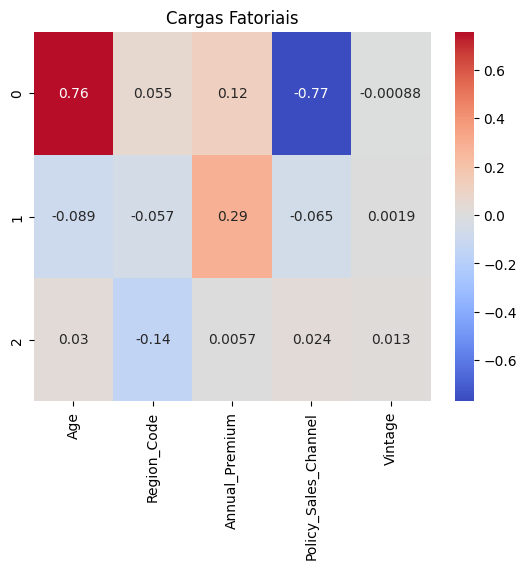

In [106]:
sns.heatmap(
    pd.DataFrame(loadings, columns=df_numeric.columns),
    annot=True,
    cmap="coolwarm",
    center=0,
)
plt.title("Cargas Fatoriais")
plt.show()

----

### 5. Interpretação e Conclusões:

* Na Análise descritiva:
    * Observamos alguns pontos importantes em nossos dados. O gênero está bem equilibrado, e há uma concentração significativa de indivíduos na faixa etária de 25 a 30 anos.
* Na Análise multivariada:
    * Realizamos uma análise mais abrangente, identificando clusters e desenvolvendo um possível modelo para prever tipos de clientes (Low, Medium e High).
    * Essas descobertas podem ser valiosas para segmentar os clientes com base em características demográficas e de custo, fornecendo insights para orientar estratégias de marketing, precificação e atendimento ao cliente.
    * Ao aplicar o método de CCA, conseguimos identificar correlações adicionais entre os dados e verificar a aplicabilidade de um modelo de regressão.
    * Na Análise Fatorial, simplificamos nossas variáveis e identificamos correlações positivas e negativas em relação à idade e ao canal de vendas.

----

### 6. Referências 
* Base de dados - <https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction>
* Onde me basei no algoritmo Kmeans - <https://medium.com/@marciochiara/k-means-5dfa794048ac#:~:text=K%2Dmeans%20%C3%A9%20um%20dos,a%20vari%C3%A2ncia%20entre%20clusters%20diferentes.>
* Análise Fatorial <https://medium.com/datarisk-io/entenda-como-a-an%C3%A1lise-fatorial-pode-ajudar-em-um-melhor-entendimento-dos-dados-88c53285865c>
* Artigo original do Kmeans - <https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings-of-the-Fifth-Berkeley-Symposium-on-Mathematical-Statistics-and/chapter/Some-methods-for-classification-and-analysis-of-multivariate-observations/bsmsp/1200512992>